In [1]:
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
import re, string
import sys
import seaborn as sns
sns.set()
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
import datetime
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from itertools import chain
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from PIL import Image
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kaseymathues/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kaseymathues/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kaseymathues/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/kaseymathues/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kaseymathues/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
#read in csv file
df = pd.read_csv('Resources/US_Reviews.csv')

In [3]:
df.head(2)

,Retailer ID,Retailer Name,Retailer SKU,UPC,Model Number,Title,Brand,Category,Subcategory,Week ID,Week Ending,Review Date,Review ID,Review Stars,Is Verified,Has Response,Review Text,Review Title,Reviews Url,Reviewer
0,1,Amazon.com,B0735Q681B,7.544650e+11,70907205419,SKYN Elite – 36 Count – Ultra-Thin Lubricated...,SKYN,Sexual Wellness,Condoms,202245,11/12/2022,11/12/2022,R3A94R1G39RSYD,5,yes,no,Pretty good rubbers. Great for pounding and ...,Good Rubbers,https://www.amazon.com/gp/customer-reviews/R3A...,Fat Dabs
1,1,Amazon.com,B00WX0RJVS,8.858930e+11,2076438,SKYN Elite Condoms 10 Count (Pack of 1),SKYN,Sexual Wellness,Condoms,202245,11/12/2022,11/12/2022,R2MBHRRN9LP4VS,5,yes,no,They are good out of the whole box i did hav...,They are good,https://www.amazon.com/gp/customer-reviews/R2M...,Roberto coronado medina


In [4]:
#rename headings
df.rename(columns={'Retailer ID': 'retailer_id', 'Retailer Name': 'retailer_name', 'Retailer SKU': 'retailer_sku', 'Week ID': 'week_id', 'Week Ending':'week_ending', 'Review Date':'review_date','Review ID':'review_id','Review Stars':'review_stars','Is Verified':'is_verified','Has Response':'has_response', 'Review Text':'review_text', 'Review Title':'review_title', 'Reviews Url':'reviews_url'}, inplace=True)
df.head(2)

,retailer_id,retailer_name,retailer_sku,UPC,Model Number,Title,Brand,Category,Subcategory,week_id,week_ending,review_date,review_id,review_stars,is_verified,has_response,review_text,review_title,reviews_url,Reviewer
0,1,Amazon.com,B0735Q681B,7.544650e+11,70907205419,SKYN Elite – 36 Count – Ultra-Thin Lubricated...,SKYN,Sexual Wellness,Condoms,202245,11/12/2022,11/12/2022,R3A94R1G39RSYD,5,yes,no,Pretty good rubbers. Great for pounding and ...,Good Rubbers,https://www.amazon.com/gp/customer-reviews/R3A...,Fat Dabs
1,1,Amazon.com,B00WX0RJVS,8.858930e+11,2076438,SKYN Elite Condoms 10 Count (Pack of 1),SKYN,Sexual Wellness,Condoms,202245,11/12/2022,11/12/2022,R2MBHRRN9LP4VS,5,yes,no,They are good out of the whole box i did hav...,They are good,https://www.amazon.com/gp/customer-reviews/R2M...,Roberto coronado medina


In [5]:
#combine the review text and the review title
df['combined_text'] = df['review_text'] + ' ' + df['review_title']

#change is verfied to 1 or 0
df['is_verified'] = df['is_verified'].map({'yes': 1, 'no': 0})
df.head()

,retailer_id,retailer_name,retailer_sku,UPC,Model Number,Title,Brand,Category,Subcategory,week_id,...,review_date,review_id,review_stars,is_verified,has_response,review_text,review_title,reviews_url,Reviewer,combined_text
0,1,Amazon.com,B0735Q681B,7.544650e+11,70907205419,SKYN Elite – 36 Count – Ultra-Thin Lubricated...,SKYN,Sexual Wellness,Condoms,202245,...,11/12/2022,R3A94R1G39RSYD,5,1,no,Pretty good rubbers. Great for pounding and ...,Good Rubbers,https://www.amazon.com/gp/customer-reviews/R3A...,Fat Dabs,Pretty good rubbers. Great for pounding and ...
1,1,Amazon.com,B00WX0RJVS,8.858930e+11,2076438,SKYN Elite Condoms 10 Count (Pack of 1),SKYN,Sexual Wellness,Condoms,202245,...,11/12/2022,R2MBHRRN9LP4VS,5,1,no,They are good out of the whole box i did hav...,They are good,https://www.amazon.com/gp/customer-reviews/R2M...,Roberto coronado medina,They are good out of the whole box i did hav...
2,1,Amazon.com,B004TTXA3W,8.911520e+11,2076453,"SKYN Polyisoprene Large Condoms Natural, 12 C...",SKYN,Sexual Wellness,Condoms,202245,...,11/12/2022,R1QSDLGH59FSR9,5,1,no,My kids use my Amazon account and my junior i...,Son from college vouches for these!,https://www.amazon.com/gp/customer-reviews/R1Q...,Maia Marie,My kids use my Amazon account and my junior i...
3,1,Amazon.com,B007ZLL2LS,NaN,7512,SKYN Elite Extra Lube – Ultra-Thin Lubricated...,SKYN,Sexual Wellness,Condoms,202245,...,11/12/2022,R2SFPAKO9OGGGJ,5,1,no,What can I say keeps me protected lol. Will d...,Works...,https://www.amazon.com/gp/customer-reviews/R2S...,R. Fell,What can I say keeps me protected lol. Will d...
4,1,Amazon.com,B004TTXA3W,8.911520e+11,2076453,"SKYN Polyisoprene Large Condoms Natural, 12 C...",SKYN,Sexual Wellness,Condoms,202245,...,11/11/2022,R2KQG6C61RGXBD,4,1,no,Medium-Large but not extra large. Rolls on sm...,Perfect,https://www.amazon.com/gp/customer-reviews/R2K...,Amazon Customer,Medium-Large but not extra large. Rolls on sm...


# CLEAN DATASET

In [6]:
#check for missing values
df.isnull().sum()

retailer_id        0
retailer_name      0
retailer_sku       0
UPC              258
Model Number     161
Title              0
Brand              0
Category           0
Subcategory        0
week_id            0
week_ending        0
review_date        0
review_id          0
review_stars       0
is_verified        0
has_response       0
review_text        5
review_title       0
reviews_url        0
Reviewer           0
combined_text      5
dtype: int64

In [7]:
#UPC & Model Number are not relevent to the analysis, so we can drop those columns
df.drop(['UPC', 'Model Number'], axis=1, inplace=True)

In [8]:
df.isnull().sum()

retailer_id      0
retailer_name    0
retailer_sku     0
Title            0
Brand            0
Category         0
Subcategory      0
week_id          0
week_ending      0
review_date      0
review_id        0
review_stars     0
is_verified      0
has_response     0
review_text      5
review_title     0
reviews_url      0
Reviewer         0
combined_text    5
dtype: int64

In [9]:
#After dropping the columns, check to see how many rows and columns are in the dataset
df.shape

(1234, 19)

In [10]:
#There are 5 rows with missing reviews, so they should be dropped from the dataset
df.dropna(inplace = True)
#check to make sure only 5 rows have been dropped
df.shape

(1229, 19)

In [11]:
#confirm there are no null values
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values")

Column retailer_id has 0 null values
Column retailer_name has 0 null values
Column retailer_sku has 0 null values
Column Title has 0 null values
Column Brand has 0 null values
Column Category has 0 null values
Column Subcategory has 0 null values
Column week_id has 0 null values
Column week_ending has 0 null values
Column review_date has 0 null values
Column review_id has 0 null values
Column review_stars has 0 null values
Column is_verified has 0 null values
Column has_response has 0 null values
Column review_text has 0 null values
Column review_title has 0 null values
Column reviews_url has 0 null values
Column Reviewer has 0 null values
Column combined_text has 0 null values


In [12]:
#check for duplicates
print(f"Duplicate entries: {df.duplicated().sum()}")

Duplicate entries: 0


In [13]:
#check unique ratings
df['review_stars'].value_counts()

5    758
1    204
4    105
3     92
2     70
Name: review_stars, dtype: int64

In [14]:
#create a target column based on review stars
df['target']=[0  if x<=3 else 1 for x in df['review_stars']]
df.head(2)

,retailer_id,retailer_name,retailer_sku,Title,Brand,Category,Subcategory,week_id,week_ending,review_date,review_id,review_stars,is_verified,has_response,review_text,review_title,reviews_url,Reviewer,combined_text,target
0,1,Amazon.com,B0735Q681B,SKYN Elite – 36 Count – Ultra-Thin Lubricated...,SKYN,Sexual Wellness,Condoms,202245,11/12/2022,11/12/2022,R3A94R1G39RSYD,5,1,no,Pretty good rubbers. Great for pounding and ...,Good Rubbers,https://www.amazon.com/gp/customer-reviews/R3A...,Fat Dabs,Pretty good rubbers. Great for pounding and ...,1
1,1,Amazon.com,B00WX0RJVS,SKYN Elite Condoms 10 Count (Pack of 1),SKYN,Sexual Wellness,Condoms,202245,11/12/2022,11/12/2022,R2MBHRRN9LP4VS,5,1,no,They are good out of the whole box i did hav...,They are good,https://www.amazon.com/gp/customer-reviews/R2M...,Roberto coronado medina,They are good out of the whole box i did hav...,1


/Users/kaseymathues/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Review Stars by Rating')

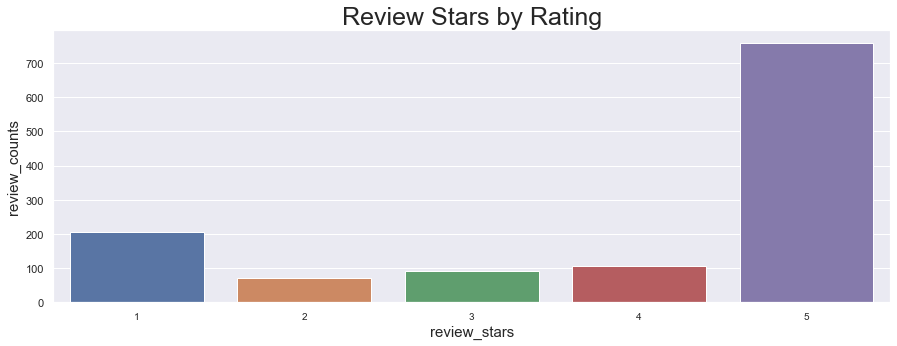

In [15]:
# create a bar chart for review stars
rating=pd.DataFrame(df['review_stars'].value_counts()).reset_index().sort_values(by='index',ascending=True)
plt.figure(figsize=(15,5))
sns.barplot(rating['index'],rating['review_stars'])
plt.xticks(fontsize=10)
plt.xlabel('review_stars',fontsize=15)
plt.ylabel('review_counts',fontsize=15)
plt.title('Review Stars by Rating',fontsize=25)

In [16]:
x=df['review_stars']


/Users/kaseymathues/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Ratings'}, xlabel='review_stars', ylabel='Density'>

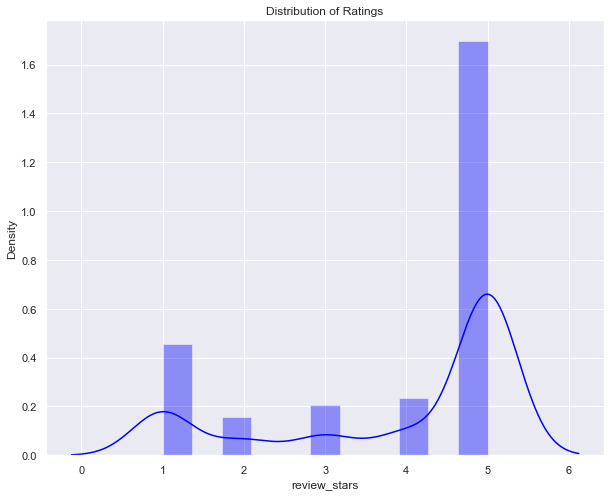

In [17]:
plt.figure(figsize=(10,8),)
plt.title('Distribution of Ratings')
sns.distplot(x,color='blue')

/Users/kaseymathues/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Good vs Bad Reviews')

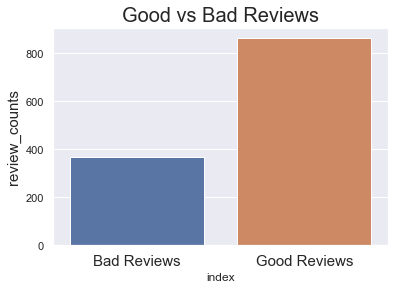

In [18]:
good_vs_bad_ratings=pd.DataFrame(df['target'].value_counts()).reset_index().sort_values(by='index',ascending=False)

sns.barplot(good_vs_bad_ratings['index'],good_vs_bad_ratings['target'])
plt.xticks([0,1],["Bad Reviews","Good Reviews"],fontsize=15)
plt.ylabel('review_counts',fontsize=15)
plt.title('Good vs Bad Reviews',fontsize=20)

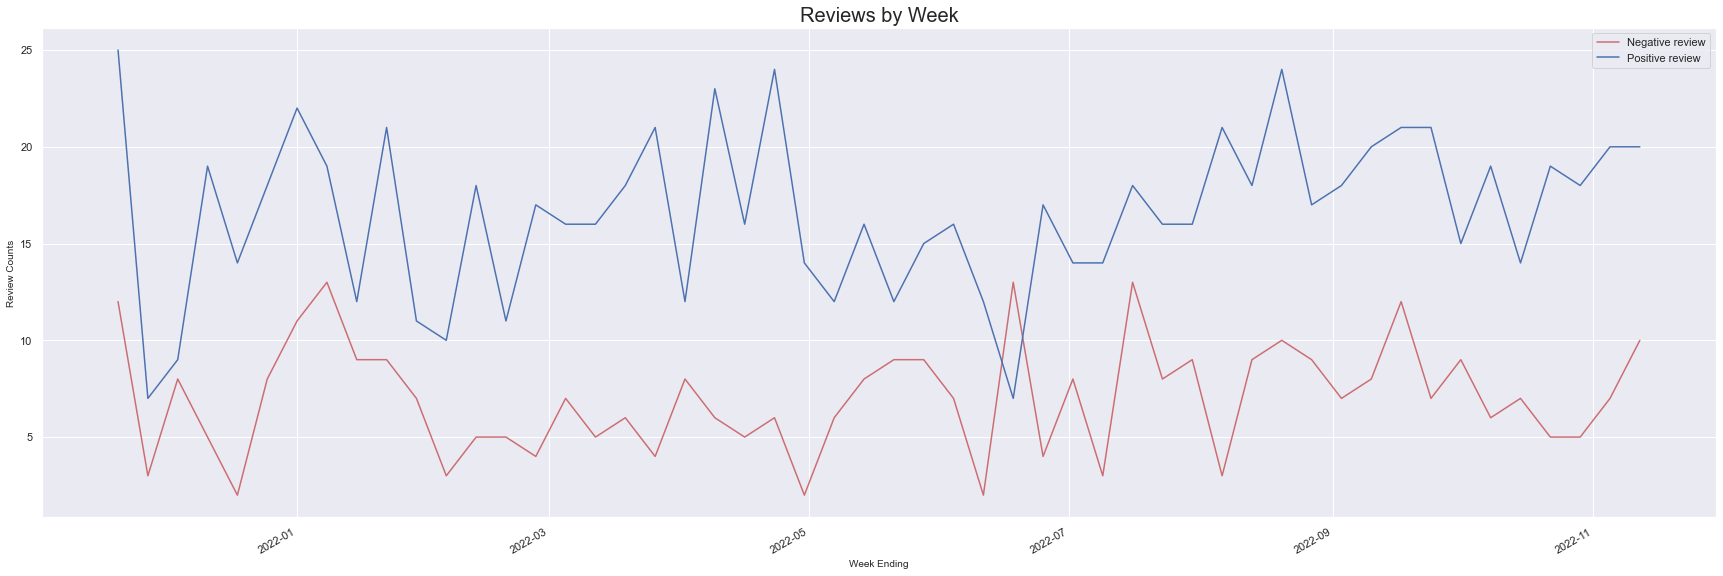

In [19]:
df['week_ending'] = pd.to_datetime(df['week_ending'])
plt.figure(figsize=(30,10))
plt.title('Reviews by Week',fontsize=20)
plt.ylabel('Review Counts',fontsize=10)
plt.xlabel('Week Ending',fontsize=10)
df[df.target==0]['week_ending'].value_counts().plot(label='Negative review',color='r',alpha=0.8)
df[df.target==1]['week_ending'].value_counts().plot(label='Positive review',color='b')
plt.legend()
plt.show()

In [20]:
#Top Rated Products
pd.DataFrame(df.groupby(['retailer_sku','Title'])['review_stars'].mean()).sort_values(by='review_stars',ascending=False).iloc[:5]

,,review_stars
retailer_sku,Title,
B004TTM2SG,"LifeStyles Pleasure Collection 12+1 Condoms Strawberry, Multi, 13 Count",5.000000
B07S6N1BJL,SKYN Elite 50Count,4.750000
B096W6RP89,"SKYN Selection Non-Latex Lubricated Condoms Variety Pack, 12 Count",4.600000
B09TQ6Q6Q9,SKYN Elite Extra Lubricated Condoms 36 Count,4.600000
B004TTXA7I,SKYN Original Condoms 24 Count (Pack of 1),4.485714


In [21]:
#Bottom Rated Products
pd.DataFrame(df.groupby(['retailer_sku','Title'])['review_stars'].mean()).sort_values(by='review_stars',ascending=True).iloc[:5]

,,review_stars
retailer_sku,Title,
B08PZCBZMS,Lifestyles Ultra Sensitive Platinum Large Latex Condom,1.000000
B07RZ12N7F,SKYN Thrill Massager,1.000000
B079JTGC5V,SKYN Elite – 22 Count – Ultra-Thin Lubricated Latex-Free Condoms,1.500000
B07TXTHP9L,SKYN Endurance Delay Spray – 0.17 fl. oz 42 sprays – Delay Spray for Men with Lidocaine for Long-Lasting Intimacy​,2.000000
B000VB95VS,Lifestyles 6903 Lifestyles Vibrating Ring 3-Count Package,3.052632


In [22]:
#most common words
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [23]:
common_words_good = get_top_n_bigram(df[df['target']==1]['combined_text'], 30)
common_words_bad= get_top_n_bigram(df[df['target']==0]['combined_text'], 30)

/Users/kaseymathues/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kaseymathues/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


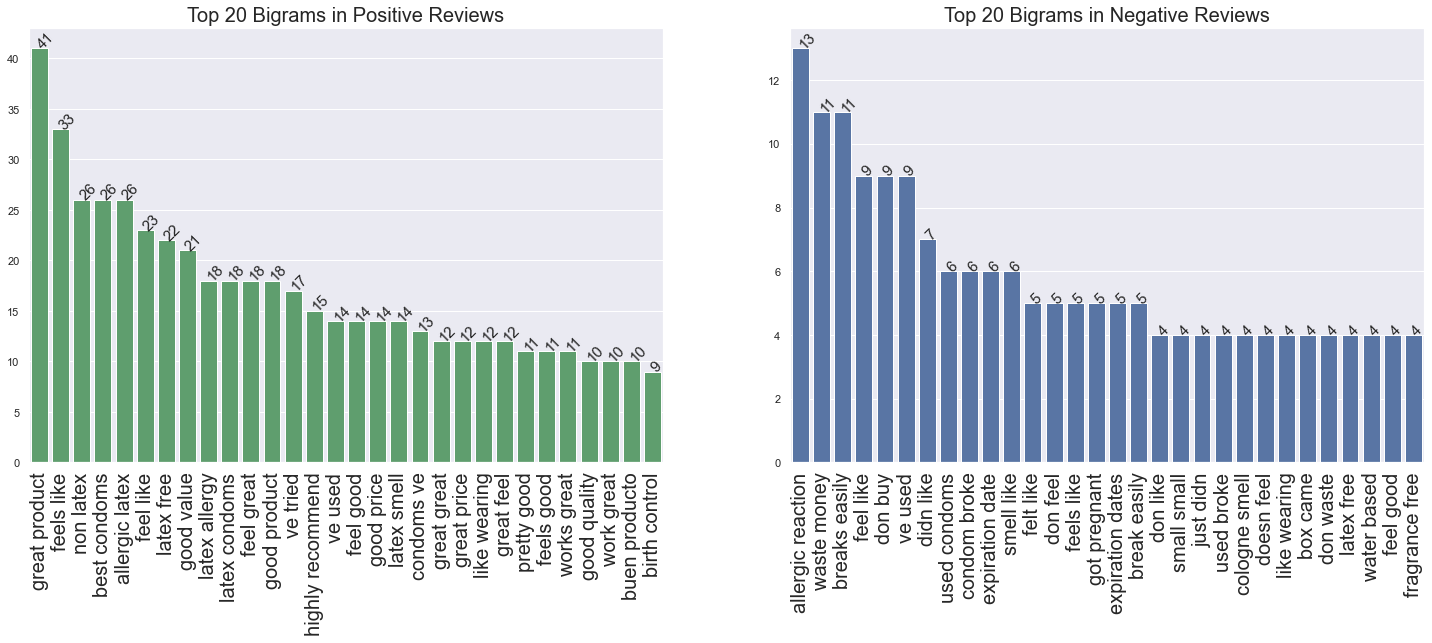

In [24]:
plt.figure(figsize=(25,8))
# good reviews bigrams
plt.subplot(1,2,1)
x_good=[x[0] for x in common_words_good]
y_good=[x[1] for x in common_words_good]
sns.barplot(x_good,y_good,color='g')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Bigrams in Positive Reviews",fontsize=20)
for i in range(len(x_good)):
    plt.text(i-0.2,y_good[i],'{}'.format(y_good[i]),size=15,rotation=45)
    
plt.subplot(1,2,2)
x_bad=[x[0] for x in common_words_bad]
y_bad=[x[1] for x in common_words_bad]
sns.barplot(x_bad,y_bad,color='b')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Bigrams in Negative Reviews",fontsize=20)
for i in range(len(x_bad)):
    plt.text(i-0.2,y_bad[i],'{}'.format(y_bad[i]),size=15,rotation=45)

In [25]:
stopword_list = stopwords.words('english')
stopword_list += list(string.punctuation)
stopword_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘',"'",
'said',"'s", "also",'one',":(",'com', '!', '-', '–', '?', '_',"/",'condom','skyn', 'wife','well','box','great','use',
'woman','like',"n't",'u','el','ye','yet', 'use','kid', 'brand']
stopword_set = set(stopword_list)

# tokenization
def process_review(review):
    tokens = nltk.word_tokenize(review)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopword_list]
    return stopwords_removed

# Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
# create a function stemming() and loop through each word in a review
def stemming(review):
    stemmed_review=[]
    for w in review:
        stemmed_review.append(ps.stem(w))
    return stemmed_review

# import libraries
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# create a function  and loop through each word in  a review
def lemmatization(review):
    lemma_list=[]
    for word in review:
        lemma_word=lemmatizer.lemmatize(word,pos='v') 
        lemma_list.append(lemma_word)
    return lemma_list

# Conbime all functions above and obtian cleaned text data 
def data_preprocessing(review):
    #tokenization, stop words removal, punctuation marks removel
    processed_review=list(map(process_review,review))
    # stemming
    stemming_reviews=list(map(stemming,processed_review))
    # lemmatization
    lemma_reviews=list(map(lemmatization,stemming_reviews))
    return lemma_reviews

cleaned_text_data=data_preprocessing(df['combined_text'])

In [26]:
stopword_set

{'!',
 '"',
 '""',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 "'s",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '...',
 '/',
 ':',
 ':(',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '``',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'box',
 'brand',
 'but',
 'by',
 'can',
 'com',
 'condom',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'el',
 'few',
 'for',
 'from',
 'further',
 'great',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'kid',
 

In [27]:
cleaned_text_data

[['pretti',
  'good',
  'rubber',
  'pound',
  'kind',
  'posit',
  'feel',
  'insid',
  'vag',
  'good',
  'rubber'],
 ['good', 'whole', 'two', 'rip', 'good'],
 ['kid',
  'amazon',
  'account',
  'junior',
  'colleg',
  'text',
  'give',
  'head',
  'order',
  'local',
  'pharmaci',
  'store',
  'around',
  'colleg',
  'jack',
  'price',
  'appar',
  'condom',
  'expens',
  'ask',
  'share',
  'detail',
  'order',
  'twice',
  'grandchildren',
  'ideal',
  'parent',
  'send',
  'son',
  'daughter',
  'son',
  'colleg',
  'vouch'],
 ['say',
  'keep',
  'protect',
  'lol',
  'definit',
  'buy',
  'worri',
  'make',
  'babi',
  'work'],
 ['medium-larg',
  'extra',
  'larg',
  'roll',
  'smoothli',
  'everi',
  'time',
  'perfect'],
 ['receiv',
  'open',
  'show',
  'photo',
  'clear',
  'evid',
  'product',
  'return',
  'someth',
  'receiv',
  '14',
  'condom',
  'instead',
  '12',
  'supposedli',
  'indic',
  'good',
  'thing',
  'order',
  'see',
  'evid',
  'give',
  'confid',
  'pro

In [28]:
# create two  new columns one for review_breakout , one for review length
df['review_breakout']=cleaned_text_data
df['review_length']=[len(x) for x in df['review_breakout']]

In [29]:
df.head(10)

,retailer_id,retailer_name,retailer_sku,Title,Brand,Category,Subcategory,week_id,week_ending,review_date,...,is_verified,has_response,review_text,review_title,reviews_url,Reviewer,combined_text,target,review_breakout,review_length
0,1,Amazon.com,B0735Q681B,SKYN Elite – 36 Count – Ultra-Thin Lubricated...,SKYN,Sexual Wellness,Condoms,202245,2022-11-12,11/12/2022,...,1,no,Pretty good rubbers. Great for pounding and ...,Good Rubbers,https://www.amazon.com/gp/customer-reviews/R3A...,Fat Dabs,Pretty good rubbers. Great for pounding and ...,1,"[pretti, good, rubber, pound, kind, posit, fee...",11
1,1,Amazon.com,B00WX0RJVS,SKYN Elite Condoms 10 Count (Pack of 1),SKYN,Sexual Wellness,Condoms,202245,2022-11-12,11/12/2022,...,1,no,They are good out of the whole box i did hav...,They are good,https://www.amazon.com/gp/customer-reviews/R2M...,Roberto coronado medina,They are good out of the whole box i did hav...,1,"[good, whole, two, rip, good]",5
2,1,Amazon.com,B004TTXA3W,"SKYN Polyisoprene Large Condoms Natural, 12 C...",SKYN,Sexual Wellness,Condoms,202245,2022-11-12,11/12/2022,...,1,no,My kids use my Amazon account and my junior i...,Son from college vouches for these!,https://www.amazon.com/gp/customer-reviews/R1Q...,Maia Marie,My kids use my Amazon account and my junior i...,1,"[kid, amazon, account, junior, colleg, text, g...",33
3,1,Amazon.com,B007ZLL2LS,SKYN Elite Extra Lube – Ultra-Thin Lubricated...,SKYN,Sexual Wellness,Condoms,202245,2022-11-12,11/12/2022,...,1,no,What can I say keeps me protected lol. Will d...,Works...,https://www.amazon.com/gp/customer-reviews/R2S...,R. Fell,What can I say keeps me protected lol. Will d...,1,"[say, keep, protect, lol, definit, buy, worri,...",10
4,1,Amazon.com,B004TTXA3W,"SKYN Polyisoprene Large Condoms Natural, 12 C...",SKYN,Sexual Wellness,Condoms,202245,2022-11-12,11/11/2022,...,1,no,Medium-Large but not extra large. Rolls on sm...,Perfect,https://www.amazon.com/gp/customer-reviews/R2K...,Amazon Customer,Medium-Large but not extra large. Rolls on sm...,1,"[medium-larg, extra, larg, roll, smoothli, eve...",8
5,1,Amazon.com,B007ZLL2LS,SKYN Elite Extra Lube – Ultra-Thin Lubricated...,SKYN,Sexual Wellness,Condoms,202245,2022-11-12,11/11/2022,...,1,no,I received the box open as shown in the photo...,open product,https://www.amazon.com/gp/customer-reviews/R10...,Jessica Carralero,I received the box open as shown in the photo...,0,"[receiv, open, show, photo, clear, evid, produ...",26
6,1,Amazon.com,B0735Q681B,SKYN Elite – 36 Count – Ultra-Thin Lubricated...,SKYN,Sexual Wellness,Condoms,202245,2022-11-12,11/10/2022,...,1,no,IT BROKE! AND I HAVE TO TAKE A PLAN B!! :(((((,IT BROKE! AND I HAVE TO TAKE A PLAN B!! :(((((,https://www.amazon.com/gp/customer-reviews/R22...,Amazon Customer,IT BROKE! AND I HAVE TO TAKE A PLAN B!! :((((...,0,"[break, take, plan, b, break, take, plan, b]",8
7,1,Amazon.com,B0735Q681B,SKYN Elite – 36 Count – Ultra-Thin Lubricated...,SKYN,Sexual Wellness,Condoms,202245,2022-11-12,11/9/2022,...,1,no,Was so happy to discover this brand of condom...,Perfect for people sensative to latex,https://www.amazon.com/gp/customer-reviews/R3E...,Frawgenstein,Was so happy to discover this brand of condom...,1,"[happi, discov, minor, latex, allergi, take, u...",41
8,1,Amazon.com,B004TTXA7I,SKYN Original Condoms 24 Count (Pack of 1),SKYN,Sexual Wellness,Condoms,202245,2022-11-12,11/9/2022,...,1,no,Works fine lol,Works fine,https://www.amazon.com/gp/customer-reviews/R1F...,NB,Works fine lol Works fine,1,"[work, fine, lol, work, fine]",5
9,1,Amazon.com,B07N1HWVRQ,SKYN All Night Long Premium Silicone-Based Lub...,SKYN,Sexual Wellness,Sex Lubricants,202245,2022-11-12,11/9/2022,...,1,no,Just as advertised!. I would highly recommend...,One of the best,https://www.amazon.com/gp/customer-reviews/R3R...,Renate H,Just as advertised!. I would highly recommend...,1,"[advertis, would, highli, recommend, product, ...",6


In [30]:
# obtian the bad reviews and good reviews data and w
badreviews =df[df.review_stars<=3.0]['review_breakout']
goodreviews = df[df.review_stars>=4.0]['review_breakout']

In [31]:
badreviews

5       [receiv, open, show, photo, clear, evid, produ...
6            [break, take, plan, b, break, take, plan, b]
15      [throw, away, receiv, warn, amazon, say, quali...
16      [garbagedoesnt, last, big, seller, instead, ap...
17                                    [never, work, work]
                              ...                        
1224    [store, buy, check, side, side, realli, old, s...
1228                            [feel, fake, counterfeit]
1229    [buy, price, claim, ultra, thin, ultra, thin, ...
1232    [need, care, wear, alway, want, make, sure, le...
1233    [understand, review, claim, feel, wear, next, ...
Name: review_breakout, Length: 366, dtype: object

In [32]:
goodreviews.head(2)

0    [pretti, good, rubber, pound, kind, posit, fee...
1                        [good, whole, two, rip, good]
Name: review_breakout, dtype: object

In [33]:
bad_reviews=pd.DataFrame(pd.Series(chain(*badreviews)).value_counts()).sort_values(by=0,ascending=False).reset_index()
good_reviews=pd.DataFrame(pd.Series(chain(*goodreviews)).value_counts()).sort_values(by=0,ascending=False).reset_index()

In [34]:
bad_reviews.head(2)

,index,0
0,break,133
1,condom,96


In [35]:
good_reviews.head(2)

,index,0
0,feel,279
1,good,266


In [36]:
bad_reviews.to_csv('badreviews.csv', index=False)
good_reviews.to_csv('goodreviews.csv', index=False)

/Users/kaseymathues/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kaseymathues/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


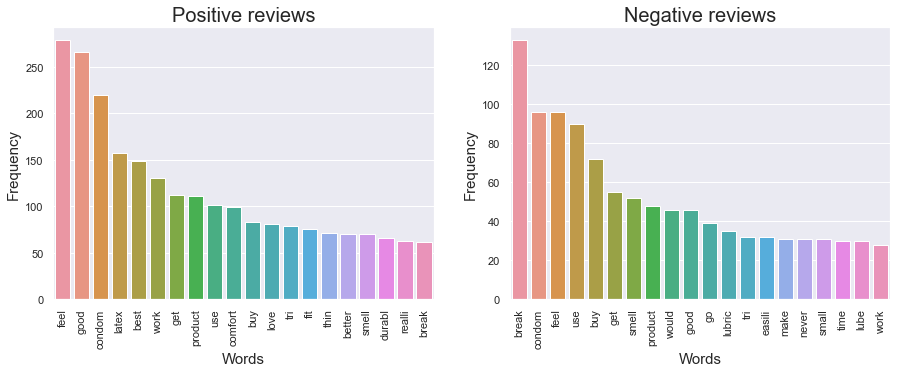

In [37]:
# Most common words in good reviews and bad reviews
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(good_reviews['index'][:20],good_reviews[0][:20])
plt.xticks(rotation=90)
plt.title('Positive reviews',fontsize=20)
plt.xlabel('Words',fontsize=15)
plt.ylabel('Frequency',fontsize=15)

plt.subplot(1,2,2)
sns.barplot(bad_reviews['index'][:20],bad_reviews[0][:20])
plt.xticks(rotation=90)
plt.title('Negative reviews',fontsize=20)
plt.xlabel('Words',fontsize=15)
plt.ylabel('Frequency',fontsize=15)


plt.show()

In [38]:
Good_wordcloud = pd.read_csv('goodreviews.csv')
Good_wordcloud.head(2)

,index,0
0,feel,279
1,good,266


In [39]:
col_list = Good_wordcloud['index'].values.tolist()
reviews_string =' '.join(map(str,col_list))
list_1 = nltk.word_tokenize(reviews_string)
print(list_1)

['feel', 'good', 'condom', 'latex', 'best', 'work', 'get', 'product', 'use', 'comfort', 'buy', 'love', 'tri', 'fit', 'thin', 'better', 'smell', 'durabl', 'realli', 'break', 'price', 'go', 'never', 'one', 'recommend', 'make', 'would', 'time', 'size', 'nice', 'perfect', 'lube', 'find', "'ve", 'ever', 'trojan', 'noth', 'valu', 'say', 'littl', 'much', 'sensit', 'amaz', 'wear', 'even', 'far', 'natur', 'allerg', 'sex', 'long', 'need', 'excel', 'still', 'irrit', 'come', 'partner', 'allergi', 'pretti', 'worth', 'thing', 'think', 'know', 'qualiti', 'muy', 'job', 'differ', 'tight', 'definit', 'protect', 'bite', 'last', "'re", 'money', 'pregnant', 'favorit', 'sure', 'way', 'want', 'brand', 'give', 'bad', 'magnum', 'alway', 'keep', 'like', 'issu', 'lubric', 'super', 'babi', 'almost', 'excelent', 'regular', 'larg', 'lo', 'take', 'lol', 'packag', 'enough', 'could', 'us', 'free', 'easi', '..', "'m", 'rip', 'skin', 'year', 'real', 'fun', 'enjoy', 'highli', 'producto', 'awesom', 'lot', 'stay', 'guy', '

# Word Cloud

In [40]:
corpus = []
for item in list_1:
    corpus.extend([word.lower() for word in nltk.word_tokenize(item)])

corpus = [w for w in corpus if w not in stopwords.words('english')]

corpus = [w for w in corpus if w.isalnum()]

corpus = [w for w in corpus if w not in stopword_set]


def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


corpus = [WordNetLemmatizer().lemmatize(w, get_wordnet_pos(w)) for w in corpus]


unique_string = " ".join(corpus)

wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
wordcloud.to_file("good_word_cloud.png")

unique_string_v2 = " ".join(corpus)
cloud_mask = np.array(Image.open("cloud.png"))
wordcloud = WordCloud(width=1000, height=500, background_color="white",
                      mask=cloud_mask, max_words=5000, contour_width=2, contour_color='black')
wordcloud.generate(unique_string_v2)
wordcloud.to_file("good_word_cloud_masked.png")

In [41]:
Bad_wordcloud = pd.read_csv('badreviews.csv')
Bad_wordcloud.head(2)

,index,0
0,break,133
1,condom,96


In [42]:
col_list_2 = Bad_wordcloud['index'].values.tolist()
reviews_string_2 =' '.join(map(str,col_list_2))
list_2 = nltk.word_tokenize(reviews_string_2)
print(list_2)

['break', 'condom', 'feel', 'use', 'buy', 'get', 'smell', 'product', 'would', 'good', 'go', 'lubric', 'tri', 'easili', 'make', 'never', 'small', 'time', 'lube', 'work', 'first', 'thin', 'tight', 'money', 'last', 'expir', 'someth', 'differ', 'thing', 'allerg', 'sticki', 'open', 'rip', 'realli', '..', 'scent', 'come', 'fragranc', 'way', 'even', 'receiv', '3', 'say', 'need', 'think', 'uncomfort', 'bad', 'disappoint', 'give', 'felt', 'recommend', 'much', 'thick', 'problem', 'sure', 'littl', 'put', 'anyth', 'one', 'dri', 'latex', 'reaction', 'review', 'want', "'ve", 'caus', '2', 'throw', 'could', 'long', "'m", 'regular', 'purchas', 'look', 'better', 'ever', 'sex', 'wast', 'pregnant', 'know', 'ca', 'suppos', 'sinc', 'date', 'durabl', 'sensat', 'experi', 'year', 'sensit', 'cologn', 'two', 'away', 'risk', 'fit', 'partner', 'complet', 'minut', 'normal', 'terribl', 'easi', 'ok', "'re", "'d", 'size', 'care', 'take', 'worth', 'find', 'happi', 'definit', 'notic', 'us', 'end', 'stuff', 'still', 'ama

In [43]:
corpus = []
for item in list_2:
    corpus.extend([word.lower() for word in nltk.word_tokenize(item)])

corpus = [w for w in corpus if w not in stopwords.words('english')]

corpus = [w for w in corpus if w.isalnum()]


def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


corpus = [WordNetLemmatizer().lemmatize(w, get_wordnet_pos(w)) for w in corpus]


unique_string = " ".join(corpus)

wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
wordcloud.to_file("bad_word_cloud.png")

unique_string_v2 = " ".join(corpus)
cloud_mask = np.array(Image.open("cloud.png"))
wordcloud = WordCloud(width=1000, height=500, background_color="white",
                      mask=cloud_mask, max_words=5000, contour_width=2, contour_color='black')
wordcloud.generate(unique_string_v2)
wordcloud.to_file("bad_word_cloud_masked.png")


# Train Test Split

In [44]:
#declare inputs and target
inputs=df[['review_breakout','week_ending']]
target=df['target']

In [45]:
#train test split dataset 
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=.2, random_state=0)

In [46]:
# join all strings together for each row 
review_train=pd.DataFrame(data=[' '.join(x) for x in x_train['review_breakout']])
review_test=pd.DataFrame(data=[' '.join(x) for x in x_test['review_breakout']])

In [47]:
x_train.columns

Index(['review_breakout', 'week_ending'], dtype='object')

# Resampling

In [48]:
# concatenate our training data back together
training  = pd.DataFrame()
training[(x_train.columns)]=x_train
training['target']=y_train
# separate minority and majority classes
rating_1= training[training.target==1.0]
rating_2= training[training.target==2.0]
rating_3= training[training.target==3.0]
rating_4= training[training.target==4.0]
rating_5= training[training.target==5.0]
list_rating_data=[rating_1,rating_2,rating_3,rating_4,rating_5]
# Get a class count to understand the class imbalance.
for i in range(0,5):
    print('rating:{} - review count: '.format(i+1)+ str(len(list_rating_data[i])))

rating:1 - review count: 696
rating:2 - review count: 0
rating:3 - review count: 0
rating:4 - review count: 0
rating:5 - review count: 0


In [49]:
training.head()

,review_breakout,week_ending,target
269,"[cant, feel, vibrat, batteri, last, .., cant, ...",2022-09-03,0
1079,"[tight, keep, eye, size, condom, order, best, ...",2022-01-01,0
409,"[use, year, buy, new, pack, start, use, realiz...",2022-07-30,0
559,"[ladi, wast, ur, money, know, price, ok, ur, g...",2022-06-18,0
271,"[realli, good, get, amaz]",2022-09-03,1


In [50]:
# separate minority and majority classes
negative_review= training[training.target==0]
positive_review= training[training.target==1]

In [51]:
# Get a class count to understand the class imbalance.
print('negative review count: '+ str(len(negative_review)))
print('positive review count: '+ str(len(positive_review)))

negative review count: 287
positive review count: 696


In [52]:
# upsample minority
negative_upsampled = resample(negative_review,
                          replace=True, 
                          n_samples=len(positive_review), 
                          random_state=23) 
negative_upsampled.head()

,review_breakout,week_ending,target
95,"[seriou, infect, use, go, doctor, buy, medicin...",2022-10-22,0
870,"[debería, un, poco, má, ancho, largo, si, es, ...",2022-03-12,0
1191,"[dri, quick, leav, sticki, feel, sticki, lube,...",2021-11-27,0
748,"[perfectli, fine, condom, 're, suppos, do.mi, ...",2022-04-16,0
234,"[feel, stud, thick, cheap, feel]",2022-09-17,0


In [53]:
# upsample minority
def upsample(minority):
    df= resample(minority,replace=True, # sample with replacement
                  n_samples=len(rating_5), # match number in majority class
                   random_state=23) # reproducible results
    return df
# using the upsamole function to obtain upsampled data 
upsampled_1=upsample(rating_1)
upsampled_2=upsample(rating_2)
upsampled_3=upsample(rating_3)
upsampled_4=upsample(rating_4)
# combine majority and upsampled minority
upsampled= pd.concat([upsampled_1,upsampled_2,upsampled_3,upsampled_4,rating_5])
# check new class counts
upsampled.target.value_counts()

Series([], Name: target, dtype: int64)

In [54]:
# combine majority and upsampled minority
upsampled= pd.concat([positive_review, negative_upsampled])

# check new class counts
upsampled.target.value_counts()

1    696
0    696
Name: target, dtype: int64

In [55]:
y_train = upsampled.target
x_train = upsampled.drop('target', axis=1)
x_train.head()

,review_breakout,week_ending
271,"[realli, good, get, amaz]",2022-09-03
255,"[yeah, excus, man, wear, thing, love, feel, ev...",2022-09-10
58,[latex],2022-10-29
874,"[feel, real, thing, work, advertis]",2022-03-05
393,"[feel, smooth, thin, smooth]",2022-08-06


# Vectorize

In [56]:
train_text=["".join(x) for x in x_train['review_breakout']]
test_text=["".join(x) for x in x_test['review_breakout']]
vectorizer=CountVectorizer()

In [57]:
X_trainc=vectorizer.fit_transform(train_text)
X_testc=vectorizer.transform(test_text)

In [58]:
def NB_GridSearch(X_train, y_train):
    grid_params = {'alpha':[0.1,0.2,0.3,0.4,0.5],
                     'fit_prior': [True, False],  }

    gs = GridSearchCV( MultinomialNB(), grid_params,scoring='f1')
    gs.fit(X_train, y_train)
    print("Best Score: ", gs.best_score_)
    return gs.best_params_.values()

In [59]:
def NaiveBayes(X_train,y_train,X_test,y_test,alpha,fit_prior):
    # fit the training dataset on the NB classifier
    Naive = MultinomialNB(alpha=0.1, fit_prior= True)
    Naive.fit(X_train,y_train)
    #prediction
    nb_train_pre=Naive.predict(X_train)
    nb_test_pre=Naive.predict(X_test)
    # Use accuracy_score function to get the accuracy
    print("Naive Bayes Train Accuracy Score :",accuracy_score(nb_train_pre, y_train))
    print("Naive Bayes Test Accuracy Score :",accuracy_score(nb_test_pre, y_test))
    # calculate f1 scores for test data and train data 
    nb_f1_score_test=f1_score(y_test,nb_test_pre)
    nb_f1_score_train=f1_score(y_train,nb_train_pre)

    print("Train data f1 score:{}".format(nb_f1_score_train))
    print("Test data f1 score:{}".format(nb_f1_score_test ))
    print("confusion_matrix:{}".format(confusion_matrix(y_test, nb_test_pre)))
    return nb_train_pre,nb_test_pre

In [60]:
alpha1,fit_prior1=NB_GridSearch(X_trainc, y_train)

Best Score:  0.9150538783267116


In [61]:
nb_train_prec,nb_test_prec=NaiveBayes(X_trainc,y_train,X_testc,y_test,alpha1,fit_prior1)

Naive Bayes Train Accuracy Score : 0.9899425287356322
Naive Bayes Test Accuracy Score : 0.3699186991869919
Train data f1 score:0.9898843930635839
Test data f1 score:0.15300546448087432
confusion_matrix:[[ 77   2]
 [153  14]]
